In [1]:
import pandas as pd


In [2]:
url = 'https://docs.google.com/spreadsheets/d/1qzKUEMklTEd2mIT15KCQrt1CPBM14p76OSwW5HBsd4M/edit?gid=1596265084#gid=1596265084'
url = url.replace('/edit?gid=', '/export?format=csv&gid=')
print(url)

https://docs.google.com/spreadsheets/d/1qzKUEMklTEd2mIT15KCQrt1CPBM14p76OSwW5HBsd4M/export?format=csv&gid=1596265084#gid=1596265084


In [3]:
df = pd.read_csv(url)
df

,Customer ID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City,ZipCode,...,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,Annual Income,Avg Monthly Spend,eBook Subscriber Flag
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Cleveland,44101,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seattle,98101,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Omaha,68101,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,Fort Worth,76101,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Oakland,94601,...,Professional,F,S,1,4,5,5,92771,95,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16514,13121,NaN,Latasha,E,Jimenez,NaN,7259 Birchwood,NaN,San Antonio,78201,...,Professional,F,M,1,4,5,5,101542,101,0
16515,26100,NaN,James,Garner,Ptaszynski,NaN,7345 Kenwal Rd.,NaN,Pittsburgh,15201,...,Professional,F,S,1,2,0,3,46549,46,0
16516,11328,NaN,Julian,M,Griffin,NaN,7398 Withersed Lane,NaN,Honolulu,96801,...,Management,M,M,1,2,0,5,133053,79,0
16517,23077,NaN,Marvin,A,Hernandez,NaN,1019 Book Road,NaN,Anaheim,92801,...,Skilled Manual,M,M,1,2,0,4,31930,65,0


Did some data cleaning before uploading the dataset. For example, spliting data into city, zip code and state.

**EDA for Customer dataset**



In [4]:
!pip install sweetviz

In [5]:
import sweetviz as sv

In [6]:
sv_report = sv.analyze(df)
sv_report.show_html('Powell Book Sweetviz Report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Powell Book Sweetviz Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.



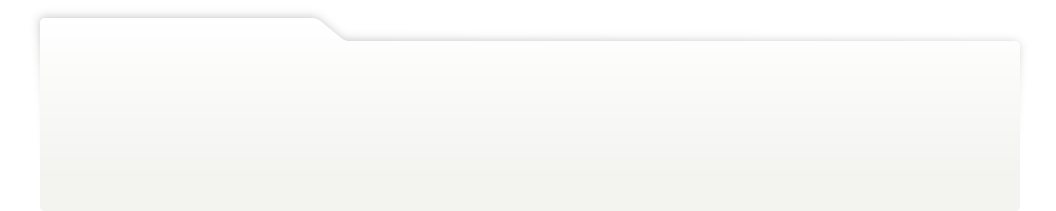
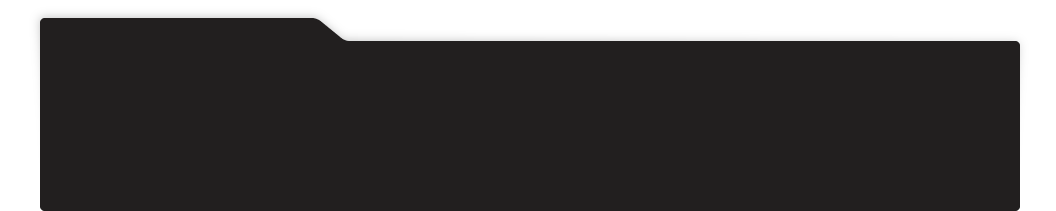
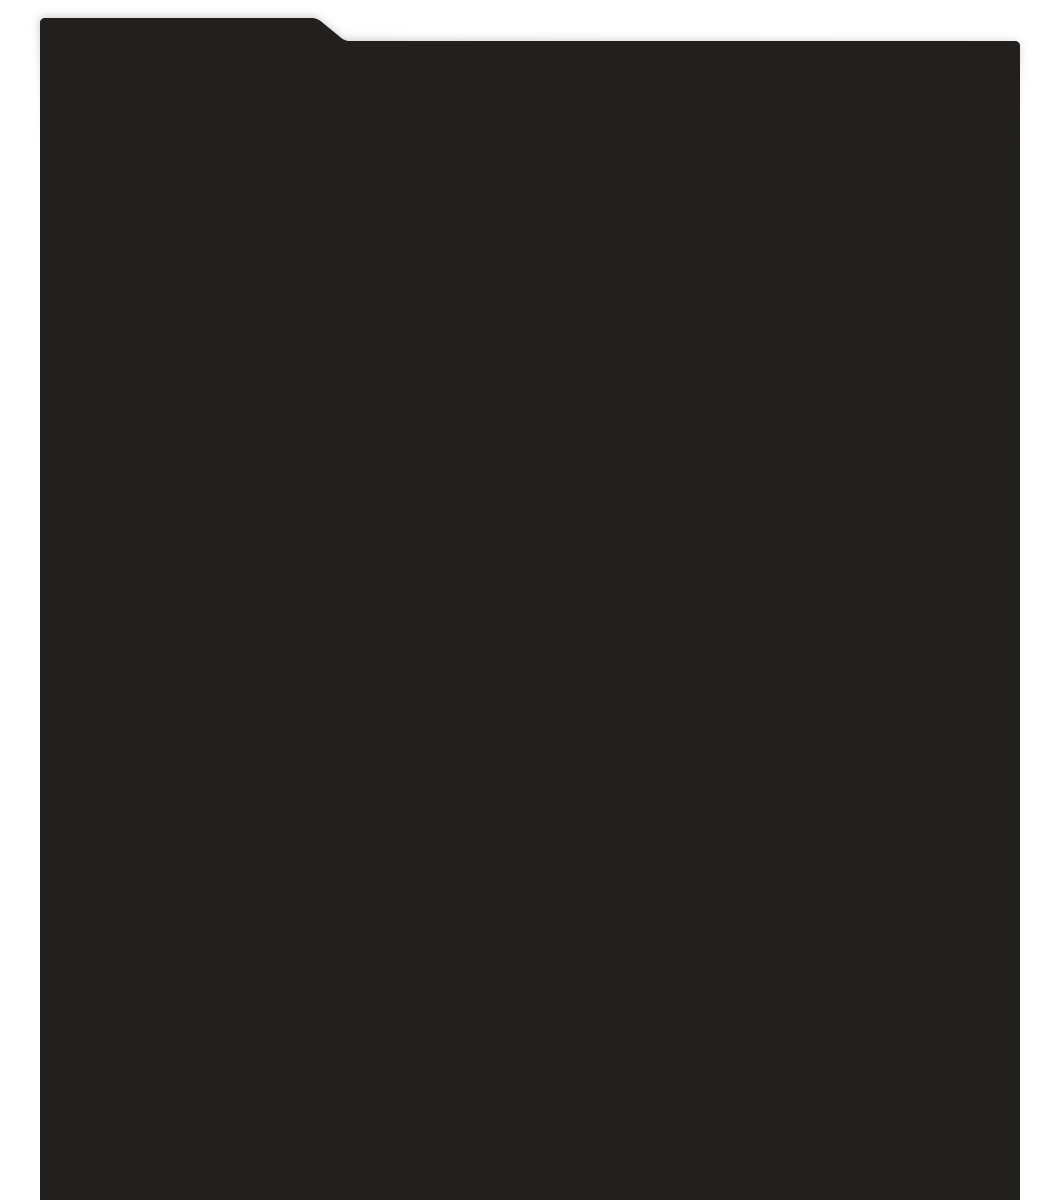
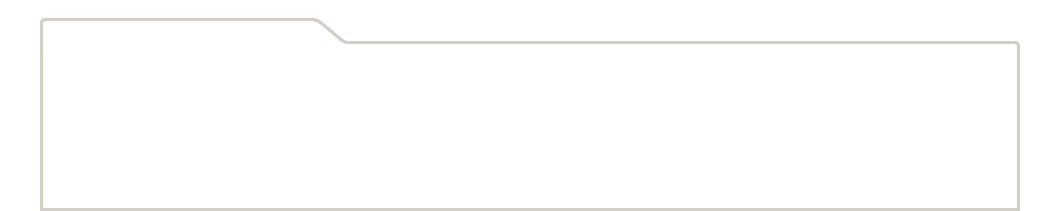
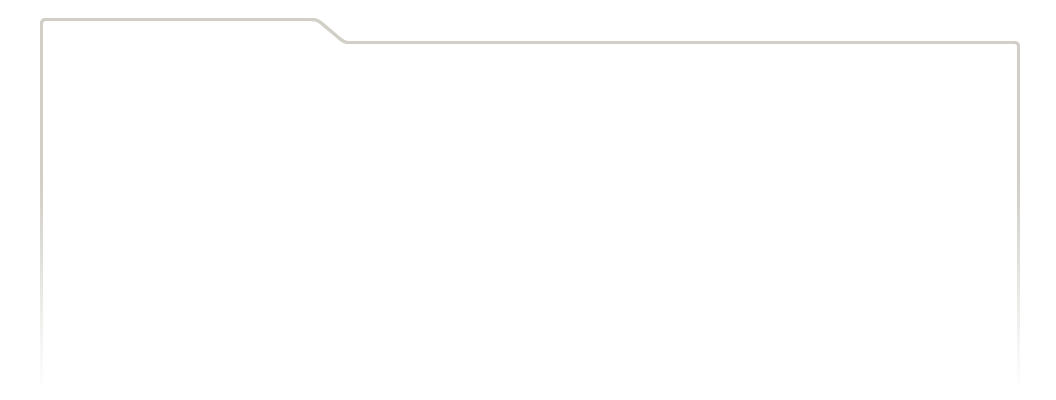
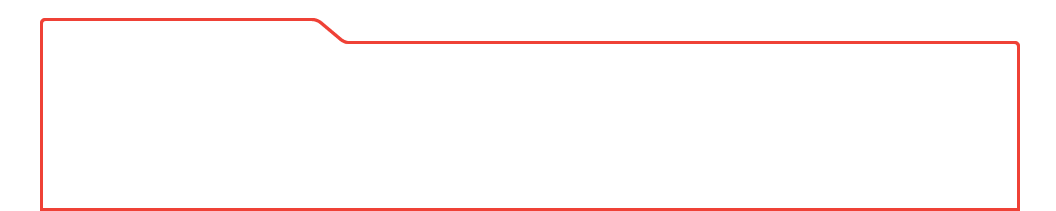
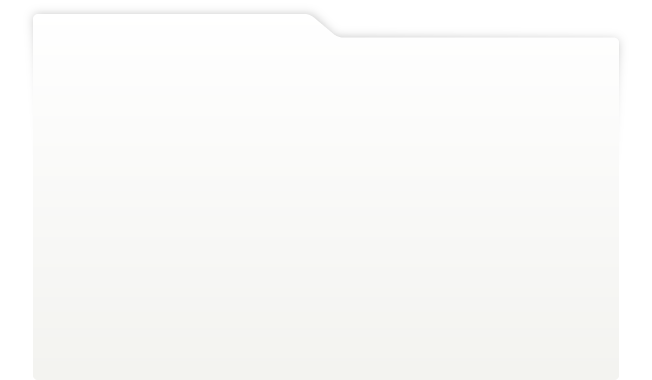
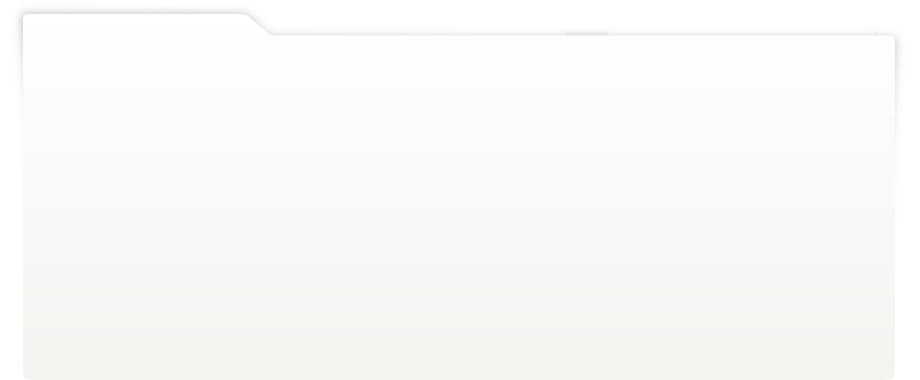
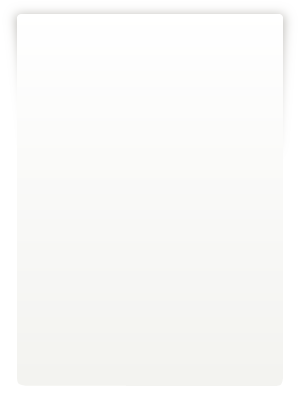
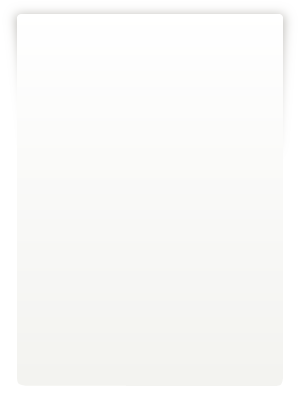
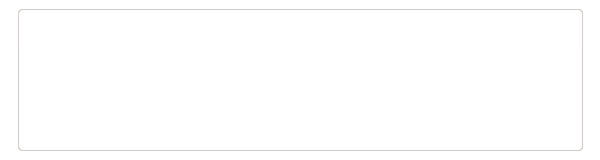
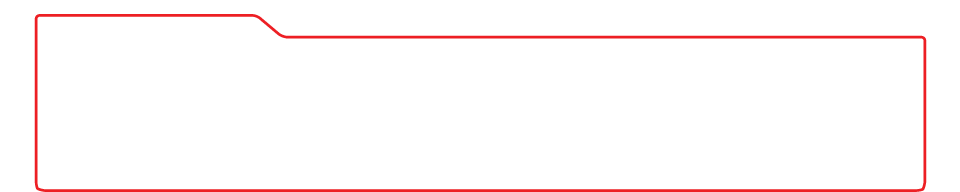
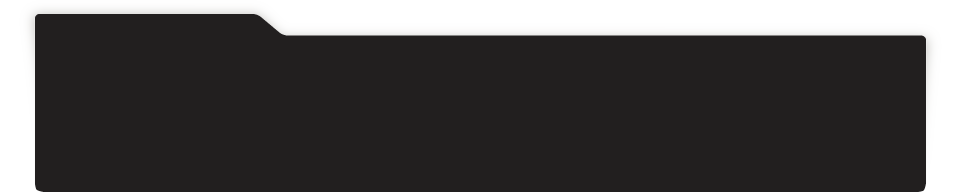
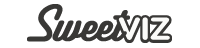
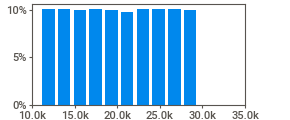
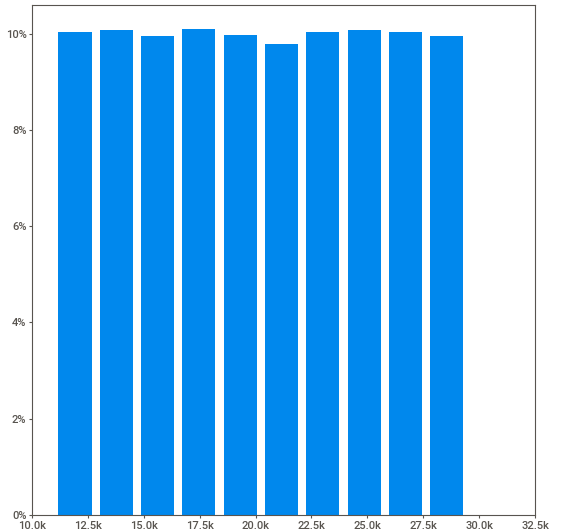
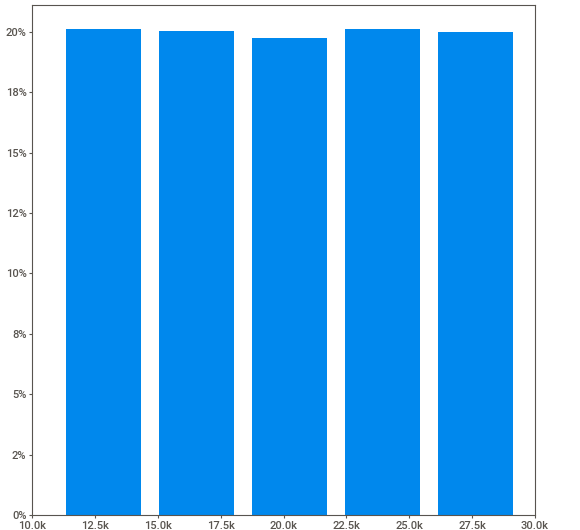
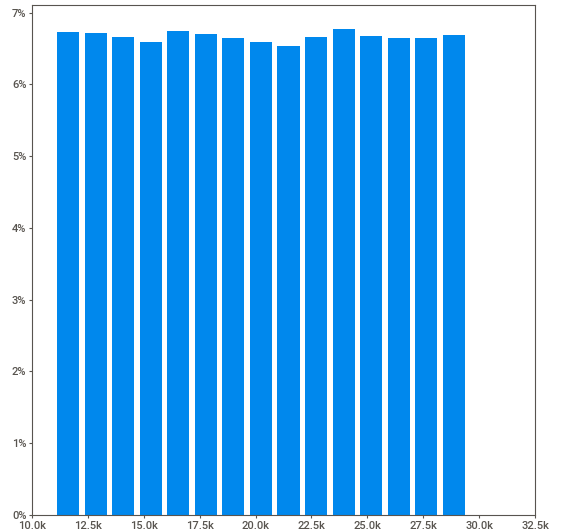
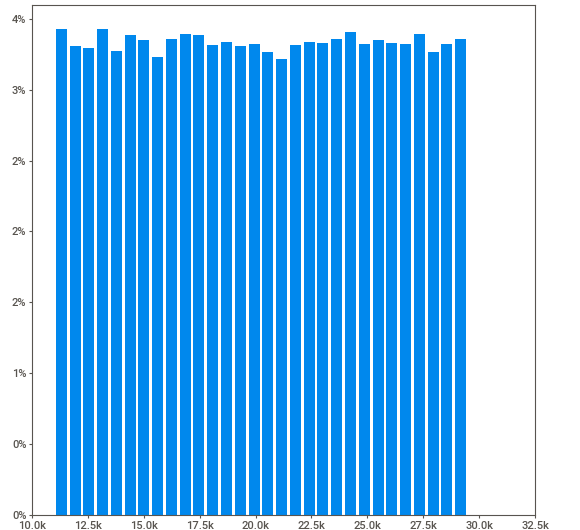
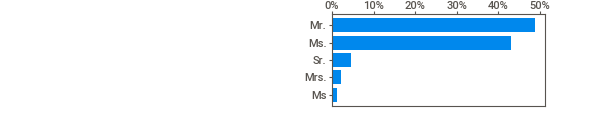
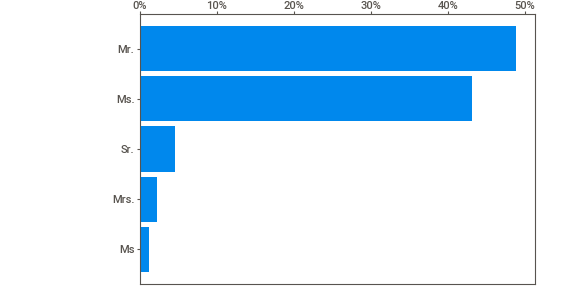
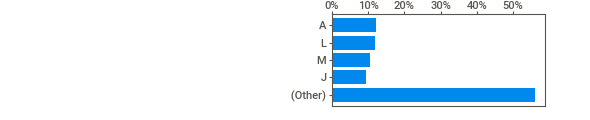
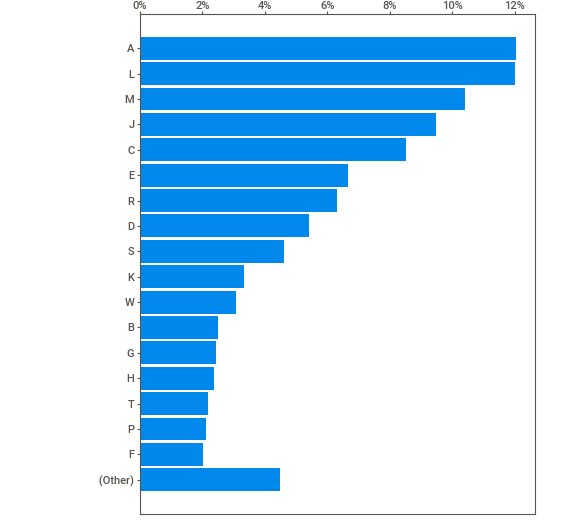
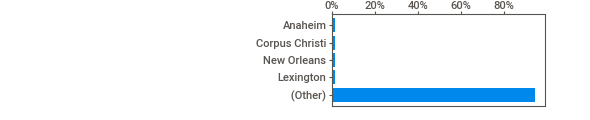
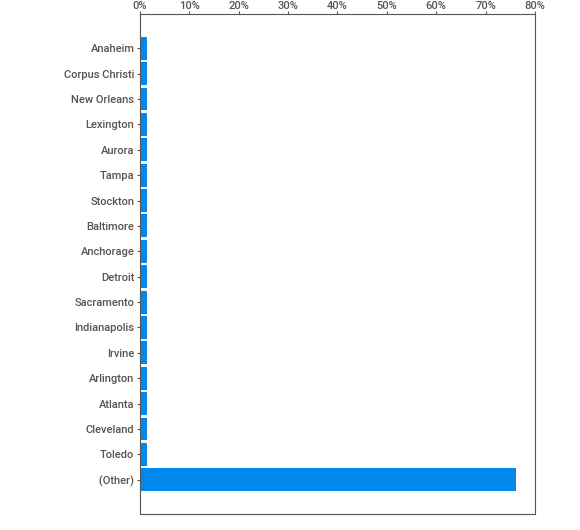
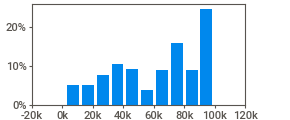
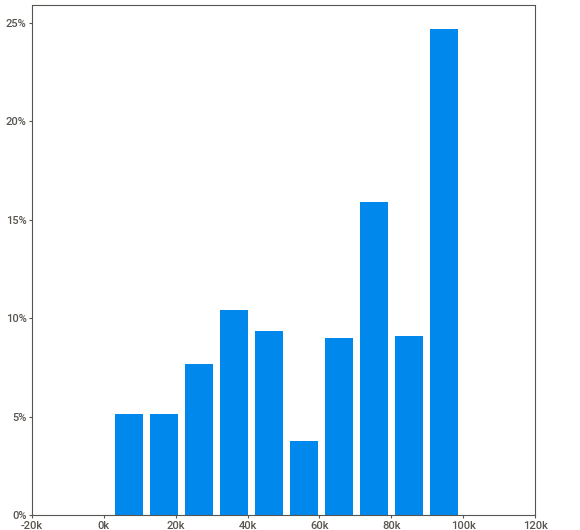
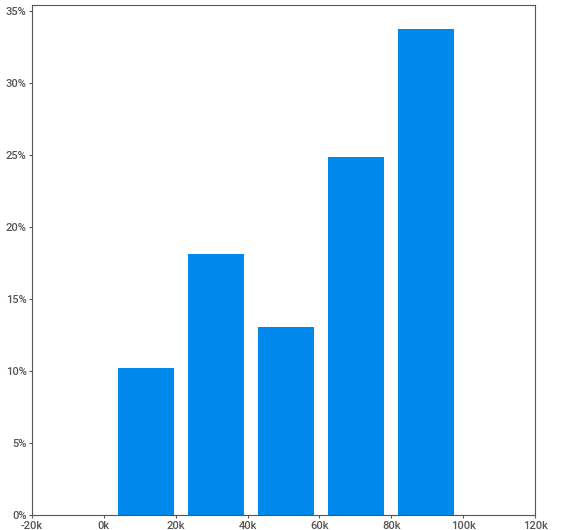
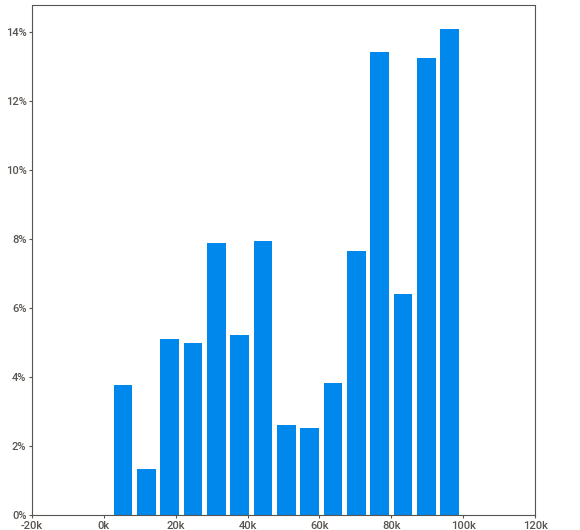
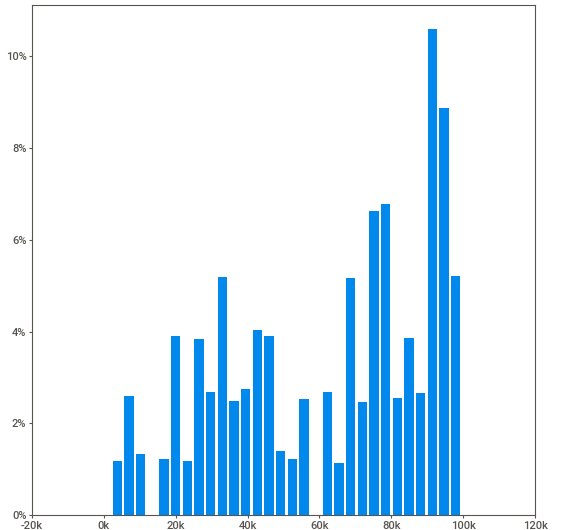
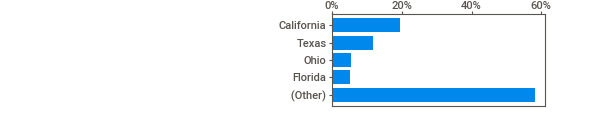
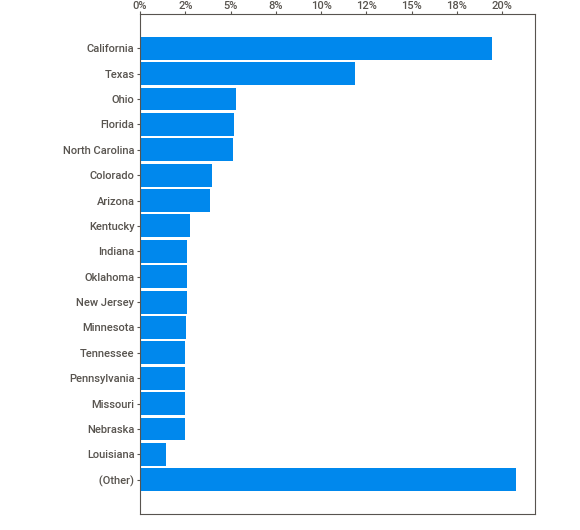
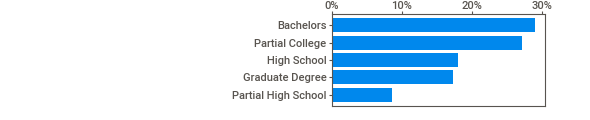
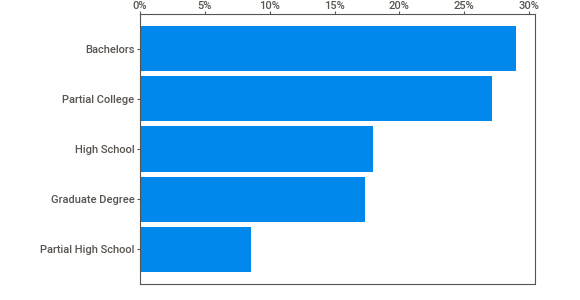
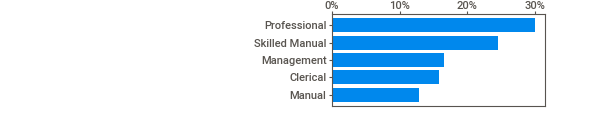
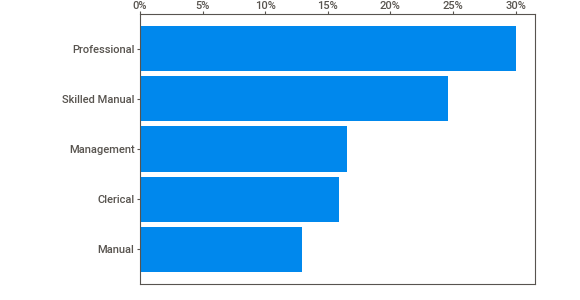
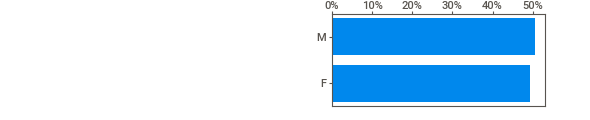
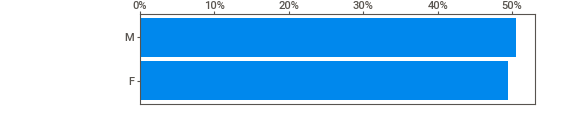
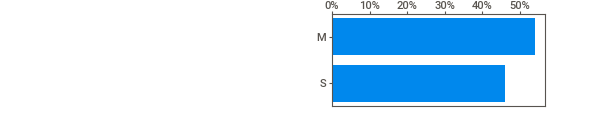
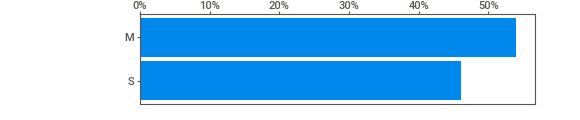
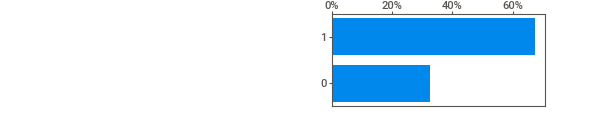
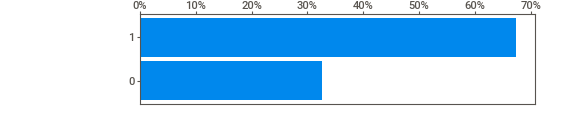
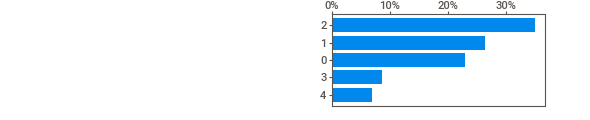
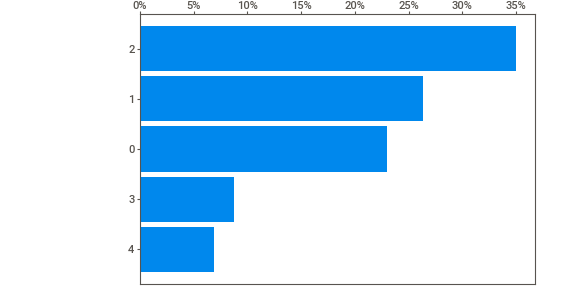
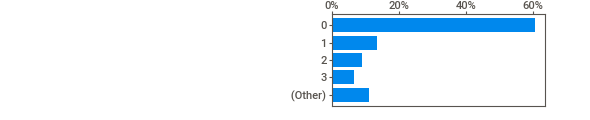
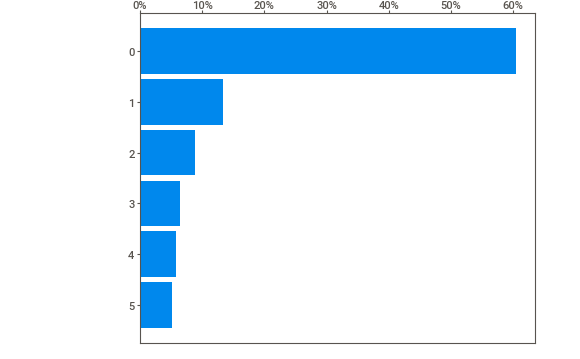
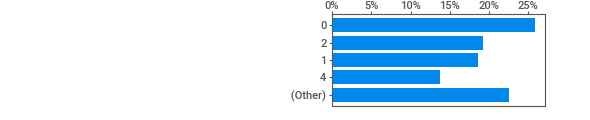
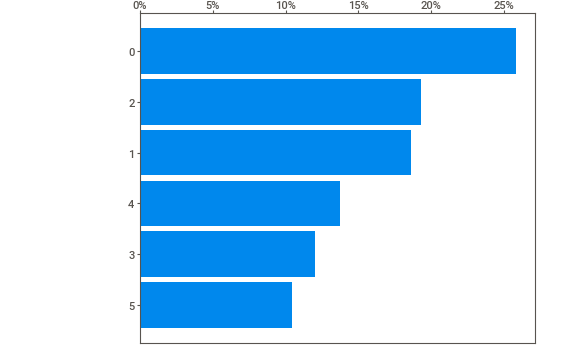
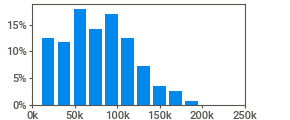
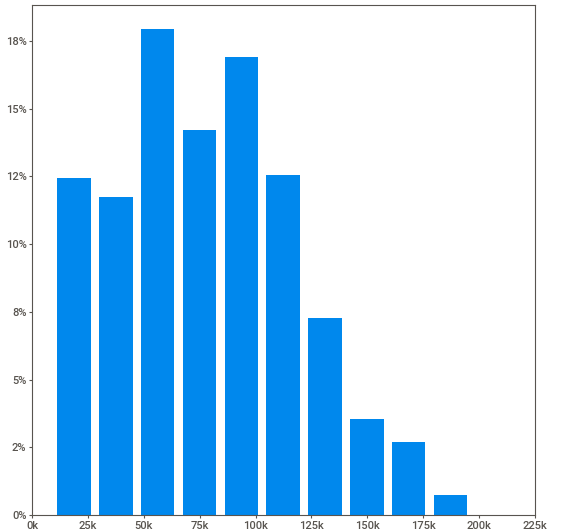
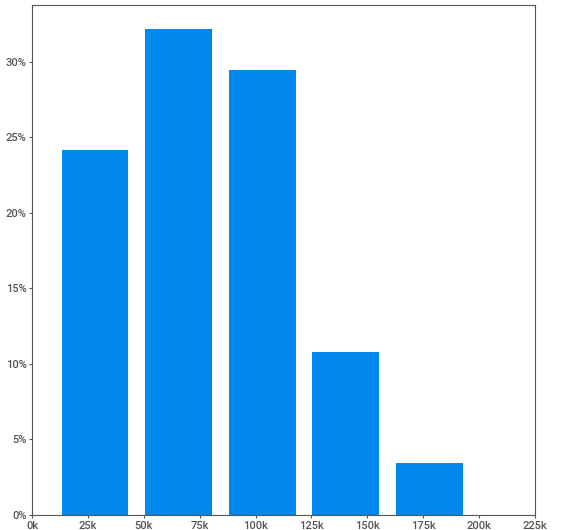
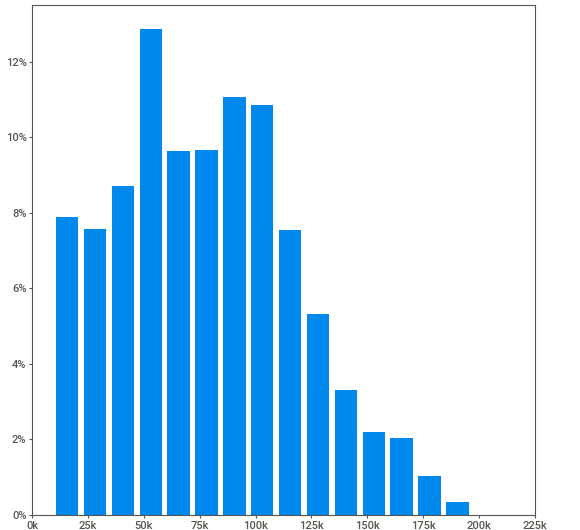
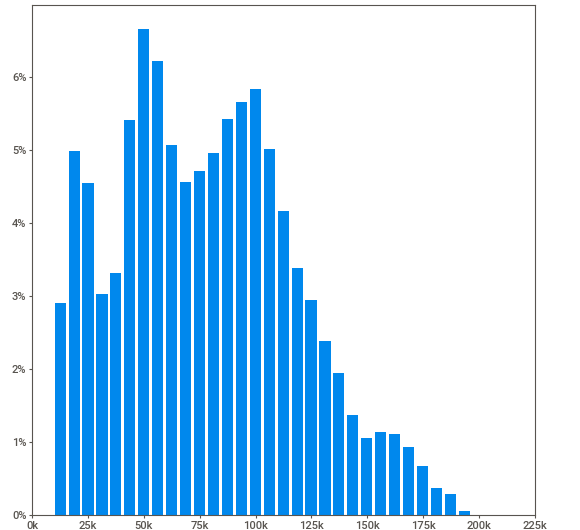
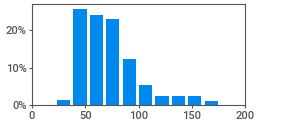
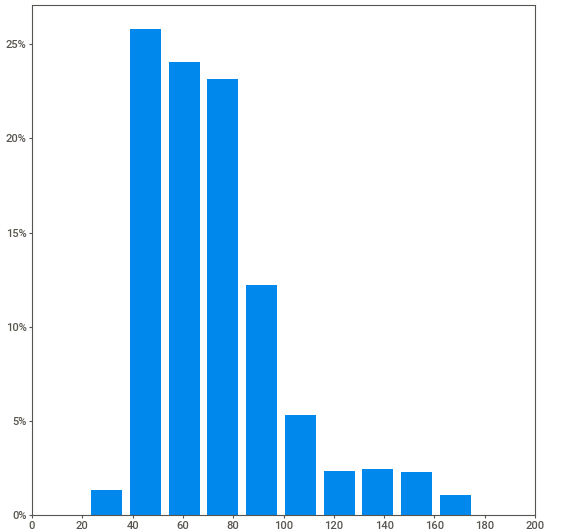
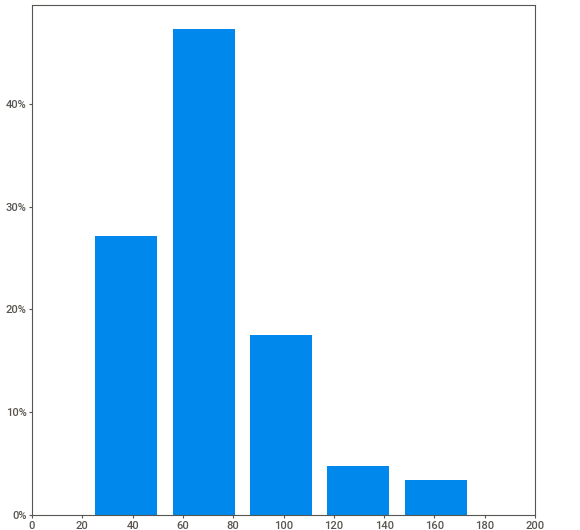
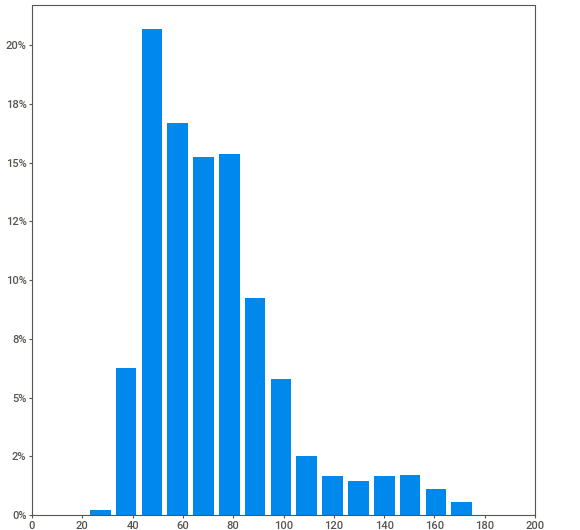
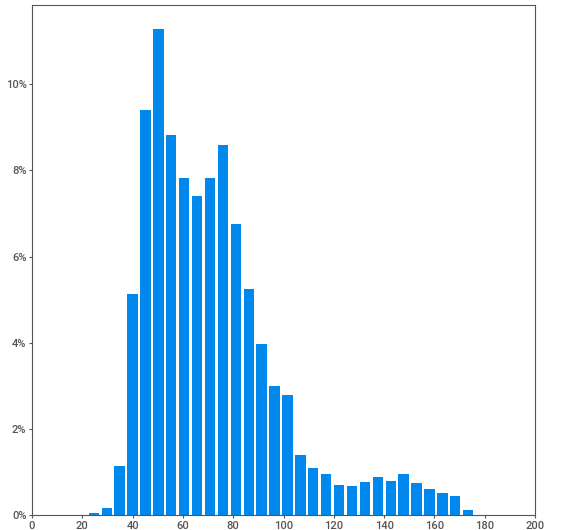
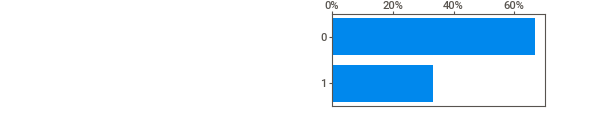
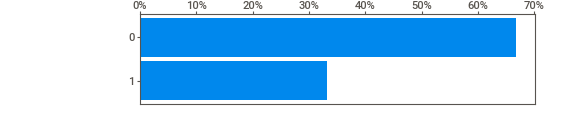
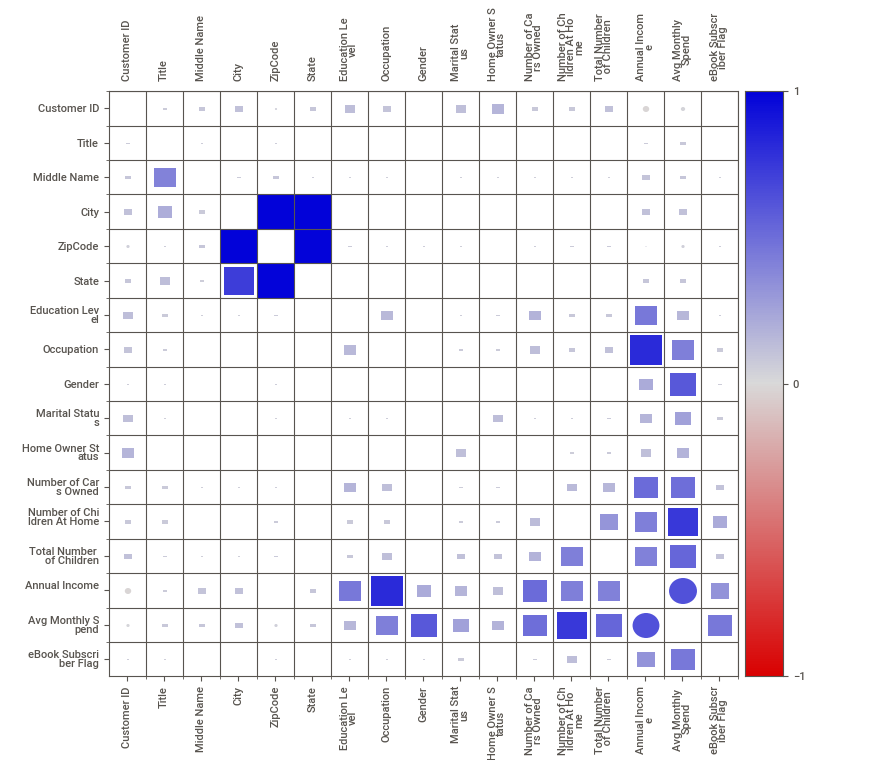
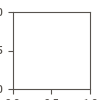

In [7]:
sv_report.show_notebook()


In [8]:
!pip install dataprep

In [9]:
import dataprep
from dataprep.eda import create_report

In [10]:
df1 = df.drop('eBook Subscriber Flag', axis=1)


In [11]:
df1.columns

Index(['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'City', 'ZipCode',
       'State', 'Birth Date', 'Education Level', 'Occupation', 'Gender',
       'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'Annual Income', 'Avg Monthly Spend'],
      dtype='object')

**REGRESSION MODEL TO ESTIMATE CUSTOMER'S AVG MONTHLY SPENDING ON BOOKS**

1. Predicting Monthly Spend: Develop a regression model to estimate each customer's average monthly spending on books, helping the bookstore optimize marketing efforts and inventory.


In [12]:
!pip install -U --pre pycaret # upgraded package and load all the prereq packages


In [13]:
#setting target variable
y = 'Avg Monthly Spend'
# setting the ignored variables
ignored_vars = ['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'Birth Date', 'Gender', 'Marital Status']

In [14]:
# setting categorical variables
cat_vars = [ 'City', 'ZipCode',
       'State', 'Occupation', 'Education Level']

In [15]:
#setting numerical variables
num_vars = ['Home Owner Status',
       'Number of Cars Owned', 'Number of Children At Home',
       'Total Number of Children', 'Annual Income']

In [41]:
from pycaret.regression import *

In [17]:
# setting/config the pycaret ML experiment
regression_model = setup(data=df1, target=y, ignore_features=ignored_vars,
                        categorical_features=cat_vars, numeric_features=num_vars)


,Description,Value
0,Session id,1645
1,Target,Avg Monthly Spend
2,Target type,Regression
3,Original data shape,"(16519, 22)"
4,Transformed data shape,"(16519, 19)"
5,Transformed train set shape,"(11563, 19)"
6,Transformed test set shape,"(4956, 19)"
7,Ignore features,11
8,Numeric features,5
9,Categorical features,5


In [18]:
compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,11.0528,177.9395,13.3388,0.7557,0.1851,0.1654,1.0250
rf,Random Forest Regressor,10.8193,187.5620,13.6943,0.7425,0.1904,0.1623,5.5310
xgboost,Extreme Gradient Boosting,11.1055,191.0039,13.8189,0.7378,0.1913,0.1655,0.5150
et,Extra Trees Regressor,10.6891,195.5562,13.9816,0.7315,0.1956,0.1612,4.3990
gbr,Gradient Boosting Regressor,12.1346,198.6034,14.0913,0.7275,0.1933,0.1798,1.5860
lr,Linear Regression,12.8442,224.4515,14.9806,0.6920,0.2016,0.1866,1.3200
ridge,Ridge Regression,12.8452,224.4516,14.9806,0.6920,0.2016,0.1866,0.1930
br,Bayesian Ridge,12.8521,224.4562,14.9807,0.6920,0.2016,0.1867,0.1960
lar,Least Angle Regression,12.8846,225.5892,15.0178,0.6905,0.2023,0.1877,0.2500
llar,Lasso Least Angle Regression,13.8711,246.8555,15.7104,0.6613,0.2102,0.2015,0.3460


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

LGBMRegressor(n_jobs=-1, random_state=1645)

In [19]:
# create the model with the best algorithm (lowest rmse)
best_model = create_model('lightgbm')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,11.0285,177.4581,13.3213,0.7582,0.1830,0.1636
1,11.2360,181.8847,13.4865,0.7534,0.1872,0.1687
2,10.9419,174.2522,13.2005,0.7534,0.1852,0.1654
3,11.0199,174.0922,13.1944,0.7605,0.1853,0.1654
4,11.0466,174.9751,13.2278,0.7538,0.1826,0.1618
5,10.9100,174.2649,13.2009,0.7631,0.1850,0.1642
6,11.0184,177.3656,13.3179,0.7614,0.1821,0.1622
7,11.1621,184.3158,13.5763,0.7549,0.1883,0.1681
8,11.0539,180.3555,13.4297,0.7655,0.1831,0.1637


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [20]:
client_data_url= 'https://docs.google.com/spreadsheets/d/16PFrqTZPLAfan6Dfu3Qep-bgwJ87P6K6FiWP-fIvJH4/edit?gid=1011251596#gid=1011251596'
client_data_url = client_data_url.replace('/edit?gid=', '/export?format=csv&gid=')
print(client_data_url)



https://docs.google.com/spreadsheets/d/16PFrqTZPLAfan6Dfu3Qep-bgwJ87P6K6FiWP-fIvJH4/export?format=csv&gid=1011251596#gid=1011251596


In [21]:
client_data = pd.read_csv(client_data_url)
client_data

,CustomerID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City,ZipCode,...,Birth Date,Education Level,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,AnnualIncome
0,Customer_xx_1289,NaN,Trevor,NaN,Jenkins,NaN,4697 Yosemite Dr.,NaN,Seattle,98101,...,19417,Graduate Degree,Management,M,S,1,2,0,3,101674
1,Customer_xx_1290,NaN,Zachary,NaN,Anderson,NaN,2476 Mt. Whitney Way,NaN,Oklahoma City,73101,...,14379,Bachelors,Management,M,M,1,2,0,5,131143
2,Customer_xx_1291,NaN,Frank,F,Navarro,NaN,Buergermeister-ulrich-str 2987,NaN,Tampa,33601,...,22503,Graduate Degree,Clerical,M,M,1,0,0,1,58637
3,Customer_xx_1292,NaN,Dennis,M,She,NaN,"828, rue de Berri",NaN,Charlotte,28201,...,22470,Graduate Degree,Clerical,M,S,1,0,0,1,45259
4,Customer_xx_1293,NaN,Randy,A,Zeng,NaN,2334 Brandywine Way,NaN,Plano,75023,...,13383,Graduate Degree,Clerical,M,M,1,0,0,1,46868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,Customer_xx_3892,NaN,Cynthia,NaN,Kapoor,NaN,7045 Creekside Drive,NaN,Denver,80201,...,28699,Partial College,Manual,F,S,0,1,0,0,20689
2604,Customer_xx_3893,NaN,Lance,NaN,Jimenez,NaN,Auf Der Steige 532,NaN,Miami,33101,...,16036,Bachelors,Clerical,M,M,1,0,0,1,59132
2605,Customer_xx_3894,NaN,Dominique,M,Saunders,NaN,3792 Westwood Ct.,NaN,Fresno,93701,...,22397,Graduate Degree,Clerical,F,M,0,0,0,3,65669
2606,Customer_xx_3895,NaN,Clayton,NaN,Zhang,NaN,"1080, quai de Grenelle",NaN,Corpus Christi,78401,...,21614,Bachelors,Clerical,M,M,1,0,0,3,59736


In [22]:
client_data.columns

Index(['CustomerID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'City', 'ZipCode',
       'State', 'Birth Date', 'Education Level', 'Occupation', 'Gender',
       'Marital Status', 'Home Owner Status', 'Number of Cars Owned',
       'Number of Children At Home', 'Total Number of Children',
       'AnnualIncome'],
      dtype='object')

In [23]:

client_data = client_data.rename(columns={'AnnualIncome': 'Annual Income'})


In [24]:
predicted_data = predict_model(best_model, data=client_data)
predicted_data

,CustomerID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City,ZipCode,...,Education Level,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,Annual Income,prediction_label
0,Customer_xx_1289,NaN,Trevor,NaN,Jenkins,NaN,4697 Yosemite Dr.,NaN,Seattle,98101,...,Graduate Degree,Management,M,S,1,2,0,3,101674,57.498127
1,Customer_xx_1290,NaN,Zachary,NaN,Anderson,NaN,2476 Mt. Whitney Way,NaN,Oklahoma City,73101,...,Bachelors,Management,M,M,1,2,0,5,131143,76.986078
2,Customer_xx_1291,NaN,Frank,F,Navarro,NaN,Buergermeister-ulrich-str 2987,NaN,Tampa,33601,...,Graduate Degree,Clerical,M,M,1,0,0,1,58637,58.104161
3,Customer_xx_1292,NaN,Dennis,M,She,NaN,"828, rue de Berri",NaN,Charlotte,28201,...,Graduate Degree,Clerical,M,S,1,0,0,1,45259,55.329849
4,Customer_xx_1293,NaN,Randy,A,Zeng,NaN,2334 Brandywine Way,NaN,Plano,75023,...,Graduate Degree,Clerical,M,M,1,0,0,1,46868,55.204104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,Customer_xx_3892,NaN,Cynthia,NaN,Kapoor,NaN,7045 Creekside Drive,NaN,Denver,80201,...,Partial College,Manual,F,S,0,1,0,0,20689,47.085762
2604,Customer_xx_3893,NaN,Lance,NaN,Jimenez,NaN,Auf Der Steige 532,NaN,Miami,33101,...,Bachelors,Clerical,M,M,1,0,0,1,59132,63.808748
2605,Customer_xx_3894,NaN,Dominique,M,Saunders,NaN,3792 Westwood Ct.,NaN,Fresno,93701,...,Graduate Degree,Clerical,F,M,0,0,0,3,65669,62.076613
2606,Customer_xx_3895,NaN,Clayton,NaN,Zhang,NaN,"1080, quai de Grenelle",NaN,Corpus Christi,78401,...,Bachelors,Clerical,M,M,1,0,0,3,59736,64.500043


In [25]:

predicted_data = predicted_data.rename(columns={'Label': 'Avg Monthly Spend'})


2. eBook Subscription Prediction: Build a classification model to identify customers likely to subscribe to the eBook service, enabling targeted promotional strategies to increase subscription rates.


**CLASSIFICATION MODEL TO IDENTIFY CUSTOMERS LIKELY TO SUBSCRIBE EBOOK SERVICE**

In [26]:
df2 = df.drop('Avg Monthly Spend', axis=1)

In [27]:
# target variable
y = 'eBook Subscriber Flag'
# ignored variables
ignored_vars = ['Customer ID', 'Title', 'First Name', 'Middle Name', 'Last Name',
       'Suffix', 'Street Address1', 'Street Address2', 'Birth Date', 'Gender', 'Marital Status']

In [28]:
cat_vars = [ 'City', 'ZipCode',
       'State', 'Occupation', 'Education Level']

In [29]:
num_vars = ['Home Owner Status',
       'Number of Cars Owned', 'Number of Children At Home',
       'Total Number of Children', 'Annual Income']

In [30]:
df2[y].value_counts()


,eBook Subscriber Flag
0,11030
1,5489


In [31]:
from pycaret.classification import *

In [32]:
# Configuration of model
classification_model = setup(data = df2, target = y,
                                 ignore_features = ignored_vars,
                                 categorical_features = cat_vars,
                                 numeric_features = num_vars, train_size=0.8)

,Description,Value
0,Session id,4740
1,Target,eBook Subscriber Flag
2,Target type,Binary
3,Original data shape,"(16519, 22)"
4,Transformed data shape,"(16519, 19)"
5,Transformed train set shape,"(13215, 19)"
6,Transformed test set shape,"(3304, 19)"
7,Ignore features,11
8,Numeric features,5
9,Categorical features,5


In [33]:
compare_models(budget_time= 100)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7699,0.8020,0.5454,0.6968,0.6116,0.4516,0.4586,1.9770
lightgbm,Light Gradient Boosting Machine,0.7663,0.8008,0.5366,0.6914,0.6040,0.4419,0.4492,0.9080
ada,Ada Boost Classifier,0.7625,0.7905,0.5001,0.6998,0.5831,0.4235,0.4353,0.7250
lr,Logistic Regression,0.7620,0.7923,0.4607,0.7227,0.5624,0.4099,0.4296,1.4160
lda,Linear Discriminant Analysis,0.7605,0.7898,0.4559,0.7210,0.5583,0.4053,0.4255,0.3350
ridge,Ridge Classifier,0.7593,0.7900,0.4455,0.7242,0.5513,0.3994,0.4216,0.2180
xgboost,Extreme Gradient Boosting,0.7567,0.7850,0.5233,0.6723,0.5884,0.4195,0.4262,0.3920
nb,Naive Bayes,0.7470,0.7349,0.4052,0.7085,0.5152,0.3609,0.3868,0.3570
rf,Random Forest Classifier,0.7431,0.7666,0.5370,0.6341,0.5813,0.3979,0.4009,2.1950
et,Extra Trees Classifier,0.7256,0.7474,0.5413,0.5961,0.5672,0.3671,0.3681,1.9150


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=4740, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [34]:
#building model using the gbc
best_model = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7663,0.7917,0.5216,0.6982,0.5971,0.4373,0.4465
1,0.7579,0.7978,0.5604,0.6595,0.6059,0.4329,0.4359
2,0.7852,0.8136,0.5649,0.7273,0.6359,0.4869,0.4947
3,0.7648,0.8068,0.5148,0.6975,0.5924,0.4323,0.4421
4,0.7466,0.7800,0.5250,0.6471,0.5797,0.4011,0.4056
5,0.7865,0.8144,0.5854,0.7199,0.6457,0.4953,0.5007
6,0.7752,0.7987,0.5626,0.7017,0.6245,0.4668,0.4726
7,0.7714,0.8085,0.5330,0.7069,0.6078,0.4509,0.4599
8,0.7835,0.8061,0.5535,0.7297,0.6295,0.4806,0.4898


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

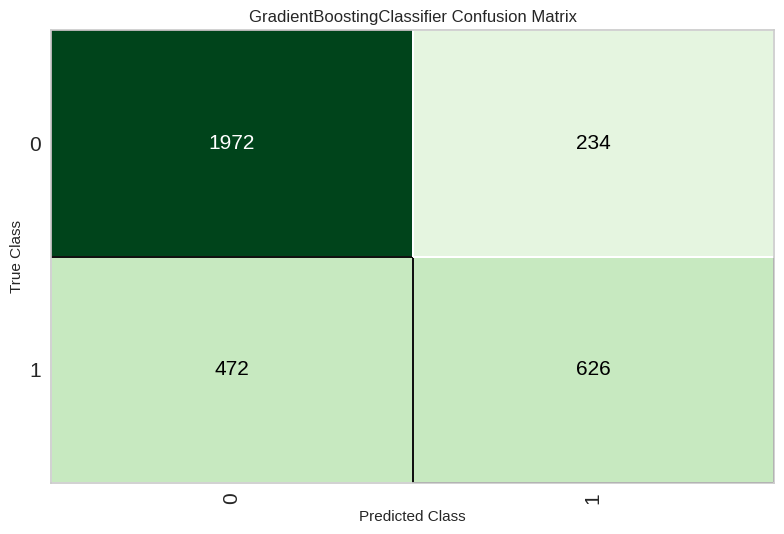

In [35]:
# Display confusion metrics
plot_model(best_model, plot = 'confusion_matrix')

In [36]:
evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [37]:
eBook_Subscriber_Flag_prediction = predict_model(best_model, data = client_data)

eBook_Subscriber_Flag_prediction

,CustomerID,Title,First Name,Middle Name,Last Name,Suffix,Street Address1,Street Address2,City,ZipCode,...,Occupation,Gender,Marital Status,Home Owner Status,Number of Cars Owned,Number of Children At Home,Total Number of Children,Annual Income,prediction_label,prediction_score
0,Customer_xx_1289,NaN,Trevor,NaN,Jenkins,NaN,4697 Yosemite Dr.,NaN,Seattle,98101,...,Management,M,S,1,2,0,3,101674,0,0.9150
1,Customer_xx_1290,NaN,Zachary,NaN,Anderson,NaN,2476 Mt. Whitney Way,NaN,Oklahoma City,73101,...,Management,M,M,1,2,0,5,131143,0,0.9042
2,Customer_xx_1291,NaN,Frank,F,Navarro,NaN,Buergermeister-ulrich-str 2987,NaN,Tampa,33601,...,Clerical,M,M,1,0,0,1,58637,0,0.7627
3,Customer_xx_1292,NaN,Dennis,M,She,NaN,"828, rue de Berri",NaN,Charlotte,28201,...,Clerical,M,S,1,0,0,1,45259,0,0.8768
4,Customer_xx_1293,NaN,Randy,A,Zeng,NaN,2334 Brandywine Way,NaN,Plano,75023,...,Clerical,M,M,1,0,0,1,46868,0,0.8769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2603,Customer_xx_3892,NaN,Cynthia,NaN,Kapoor,NaN,7045 Creekside Drive,NaN,Denver,80201,...,Manual,F,S,0,1,0,0,20689,0,0.8954
2604,Customer_xx_3893,NaN,Lance,NaN,Jimenez,NaN,Auf Der Steige 532,NaN,Miami,33101,...,Clerical,M,M,1,0,0,1,59132,0,0.7190
2605,Customer_xx_3894,NaN,Dominique,M,Saunders,NaN,3792 Westwood Ct.,NaN,Fresno,93701,...,Clerical,F,M,0,0,0,3,65669,0,0.8087
2606,Customer_xx_3895,NaN,Clayton,NaN,Zhang,NaN,"1080, quai de Grenelle",NaN,Corpus Christi,78401,...,Clerical,M,M,1,0,0,3,59736,0,0.8329


In [38]:

eBook_Subscriber_Flag_prediction.to_csv('eBook_Subscriber_Flag_prediction.csv', index=False)
# To save as excel file
# eBook_Subscriber_Flag_prediction.to_excel('eBook_Subscriber_Flag_prediction.xlsx', index=False)


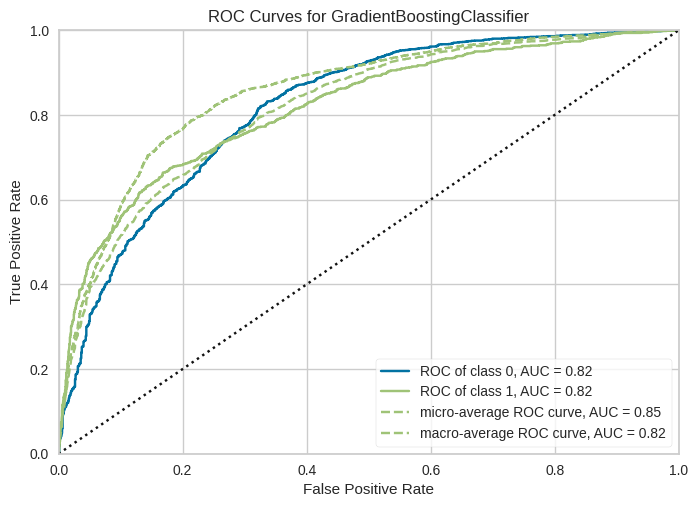

In [39]:
# to check if the classification_model has been overfitted

plot_model(best_model, plot = 'auc')



The code provided focuses on building machine learning models using PyCaret.
 The plot_model function with 'auc' as the plot parameter generates a Receiver Operating Characteristic (ROC) curve and Area Under the Curve (AUC) plot.

### Here's what the chart means:

- ROC Curve: It shows the trade-off between the true positive rate (sensitivity) and the false positive rate (1 - specificity) at various threshold settings.
- The curve illustrates how well the model can distinguish between positive and negative classes.
- AUC: The area under the ROC curve represents the overall performance of the model.
- A higher AUC value indicates better model performance. A perfect model has an AUC of 1.0, while a random model has an AUC of 0.5.

In summary, the AUC plot helps you assess the model's ability to discriminate between classes and its overall predictive power.
